# Digital Deputyship traffic distribution
As we don't have enough data per day to see usage pattern for the site, then we need to be creative.

What if we import data from last month, and group it over the day of week or an hour of day?

In [240]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Let's load data

In [241]:
data = pd.read_csv("Analytics All Web Site Data Audience Overview 20150905-20151005.csv", comment="#")
data=data[:-1]
data.describe()

,Hour Index,Sessions
count,744.000000,744.000000
mean,371.500000,0.489247
std,214.918589,1.032392
min,0.000000,0.000000
25%,185.750000,0.000000
50%,371.500000,0.000000
75%,557.250000,1.000000
max,743.000000,8.000000


In [242]:
hour_start = "20150905"
#hour_start = datetime.datetime.strptime(hour_start,"%Y%m%d")
#seems like pandas is smart enough to process the data string so line above is not needed (for now)
date_index = pd.date_range(hour_start, periods=len(data), freq='H')

Data cleaning

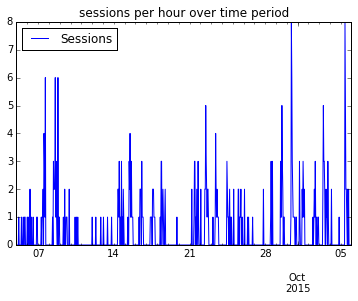

In [243]:
#clean up data
del data['Hour Index']
indexed_data = data.set_index(date_index)
indexed_data.plot(title="sessions per hour over time period")

In [244]:
# last_line = None
# for index, row in indexed_data.iterrows():
#     last_line = row
# last_line.name.dayofweek
# last_line.name.hour

## sum of sessions per week day (0 - Mon)

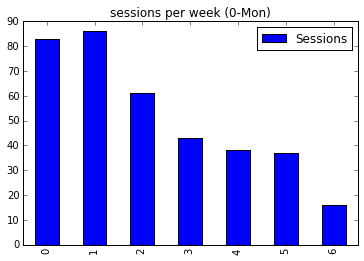

In [245]:
indexed_data.groupby(lambda x: x.dayofweek).sum().plot(kind="bar", title="sessions per week (0-Mon)")

## sum of sessions per hour

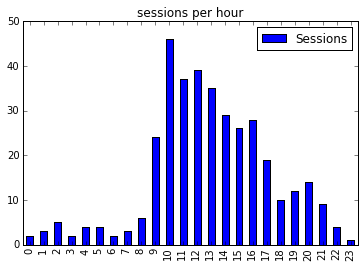

In [246]:
indexed_data.groupby(lambda x: x.hour).sum().plot(kind="bar", title="sessions per hour")

## sessions heatmap
- x axis - hour
- y axis - day of week

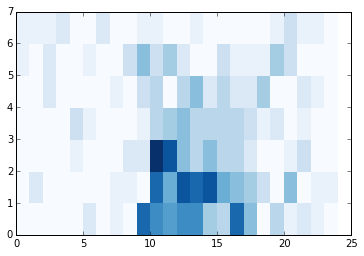

In [247]:
heat = indexed_data.groupby(lambda x: (x.dayofweek, x.hour)).sum()
mti = pd.MultiIndex.from_tuples(heat.index)
mti_data = heat.set_index(mti)
unstacked_data = mti_data.unstack(level=-1)
plt.pcolor(unstacked_data, cmap=matplotlib.cm.Blues)